# Exploratory Data Analyse

In [10]:
import pandas as pd
df = pd.read_csv(r'C:\Users\Thomas Aujoux\Documents\GitHub\food-classification\data_preparation\data_clean\clean.csv', sep=',')
df = df.drop("Unnamed: 0", axis = 1)
df.head()

,Code_produit,Secteur,abats,abbaye,abeille,abeilles,abinao,abondance,abricot,abricotabricot,...,yorik,you,yuzu,zartbitter,zawana,zero,zeste,zestes,zinc,zygochlamys
0,450,Produits laitiers et desserts frais,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,453,Produits laitiers et desserts frais,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,455,Produits laitiers et desserts frais,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,456,Produits laitiers et desserts frais,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,460,Produits laitiers et desserts frais,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## I) Descriptive statistical analysis

In [13]:
print("Number of products: {}".format(len(df.Code_produit.unique())))
df.Code_produit.unique()

Number of products: 66413


array([   450,    453,    455, ..., 101540, 101542, 101543], dtype=int64)

In [14]:
print("Number of ingredients: {}".format(len(df.columns)-2))
df.columns

Number of ingredients: 5012


Index(['Code_produit', 'Secteur', 'abats', 'abbaye', 'abeille', 'abeilles',
       'abinao', 'abondance', 'abricot', 'abricotabricot',
       ...
       'yorik', 'you', 'yuzu', 'zartbitter', 'zawana', 'zero', 'zeste',
       'zestes', 'zinc', 'zygochlamys'],
      dtype='object', length=5014)

In [15]:
print("Number of products: {}".format(len(df.Secteur.unique())))
df.Secteur.unique()

Number of products: 31


array(['Produits laitiers et desserts frais', 'Jus et nectars',
       'Compotes', 'Conserves de fruits', 'Confitures',
       'Boissons Rafraichissantes Sans Alcool',
       'Cereales pour le petit dejeuner',
       'Biscuits et gateaux industriels',
       'Chocolat et produits chocolates',
       'Panification croustillante et moelleuse', 'Aperitifs a croquer',
       'Preparations pour desserts', 'Plats cuisines frais',
       'Produits traiteurs frais',
       'Produits transformes a base de pomme de terre', 'Charcuterie',
       'Sirops et boissons concentrees a diluer', 'Snacking surgele',
       'Plats cuisines surgeles', 'Sauces condimentaires',
       'Glaces et sorbets', 'Bouillons et potages', 'Sauces chaudes',
       'Plats cuisines ambiants', 'Barres cerealieres', 'Margarines',
       'Laits infantiles', 'Aliments infantiles de diversification',
       'Fromages', 'Viennoiseries et desserts surgeles', 'Confiseries'],
      dtype=object)

In [16]:
print("Number of products: {}".format(len(df.Famille.unique())))
df.Famille.unique()

AttributeError: 'DataFrame' object has no attribute 'Famille'

In [17]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot 

trace = go.Table(
                header=dict(values=['Cuisine','Number of recipes'],
                fill = dict(color=['#EABEB0']), 
                align = ['left'] * 5),
                cells=dict(values=[df.Secteur.value_counts().index,df.Secteur.value_counts()],
                align = ['left'] * 5))

layout = go.Layout(title='Number of recipes in each cuisine category',
                   titlefont = dict(size = 20),
                   width=500, height=650, 
                   paper_bgcolor =  'rgba(0,0,0,0)',
                   plot_bgcolor = 'rgba(0,0,0,0)',
                   autosize = False,
                   margin=dict(l=30,r=30,b=1,t=50,pad=1),
                   )
data = [trace]
fig = dict(data=data, layout=layout)
iplot(fig)

We can see with the results from the file "data_recovery" that our dataset contains some problems :
- 

## II) Statistics for each Secotrs

In [34]:
df = pd.read_csv(r'C:\Users\Thomas Aujoux\Documents\GitHub\food-classification\data_preparation\data_clean\clean_for_stat.csv', sep=',')
df = df.rename(columns={ 'no_stopwords': 'Ingrédient' })
df = df.drop("Unnamed: 0", axis = 1)
df.head

<bound method NDFrame.head of        Code_produit                                  Secteur  \
0               450      Produits laitiers et desserts frais   
1               453      Produits laitiers et desserts frais   
2               455      Produits laitiers et desserts frais   
3               456      Produits laitiers et desserts frais   
4               460      Produits laitiers et desserts frais   
...             ...                                      ...   
65231        101536  Sirops et boissons concentrees a diluer   
65232        101537  Sirops et boissons concentrees a diluer   
65233        101540  Sirops et boissons concentrees a diluer   
65234        101542  Sirops et boissons concentrees a diluer   
65235        101543  Sirops et boissons concentrees a diluer   

                                              Ingrédient  
0      ['lait', 'ecreme', 'reconstitue', 'sucre', 'fr...  
1      ['yaourt', 'lait', 'partiellement', 'ecreme', ...  
2      ['yaourt', 'lait'

In [44]:
from collections import Counter, defaultdict
# calculating the usage of each ingredient, and for each cuisine
cuisine_dict = defaultdict(Counter)
index_dict = defaultdict(Counter)
total_counter = Counter()
# iterate each row
for index, row in df.iterrows():
    # get the counters
    row_counter = index_dict[row.Code_produit] 
    local_counter = cuisine_dict[row.Secteur]
    # count the ingredients usage
    arr = row.Ingrédient.strip('][').split(', ')
    for ingredient in arr:
        key = ingredient.lower()
        # increment each word count
        total_counter[key] += 1
        local_counter[key] += 1
        row_counter[key] += 1
    # update the counters
    cuisine_dict[row.Secteur] = local_counter
    index_dict[row.Code_produit] = row_counter

<Axes: title={'center': '10 Most Common Ingredients'}, xlabel='Ingrédient'>

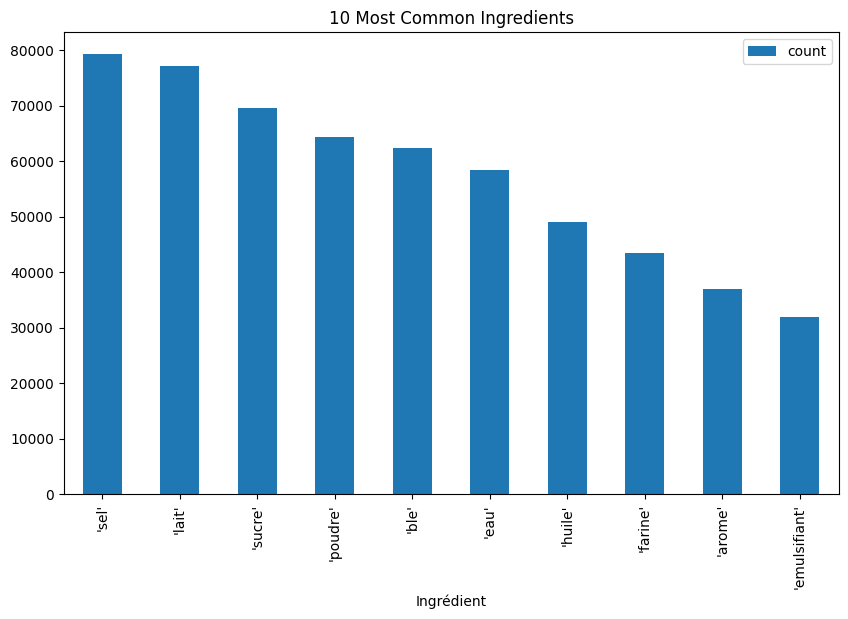

In [45]:
# plotting most common ingredients
most_common_ingredients = pd.DataFrame(total_counter.most_common(10), columns=["Ingrédient", "count"])
most_common_ingredients.plot(kind="bar", x="Ingrédient", figsize=(10,6), title="10 Most Common Ingredients")

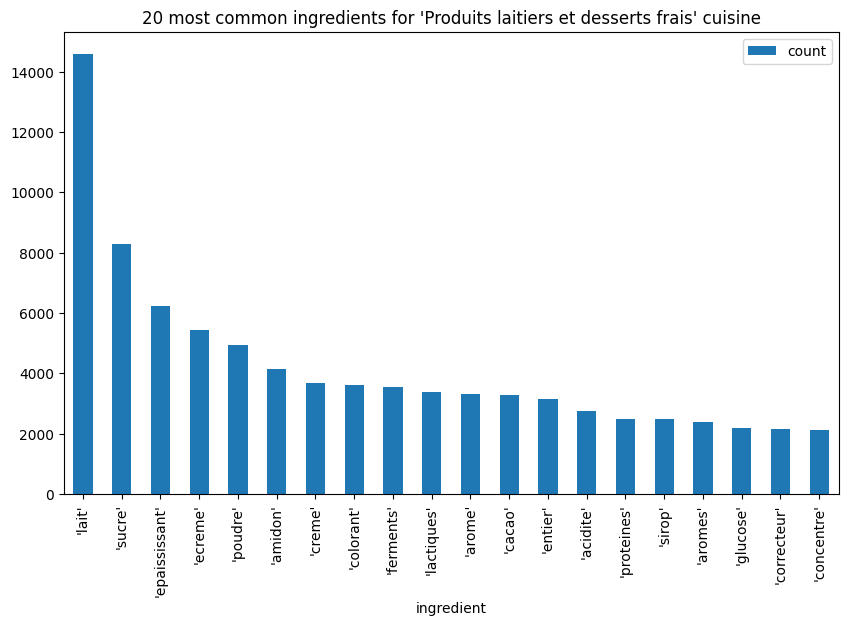

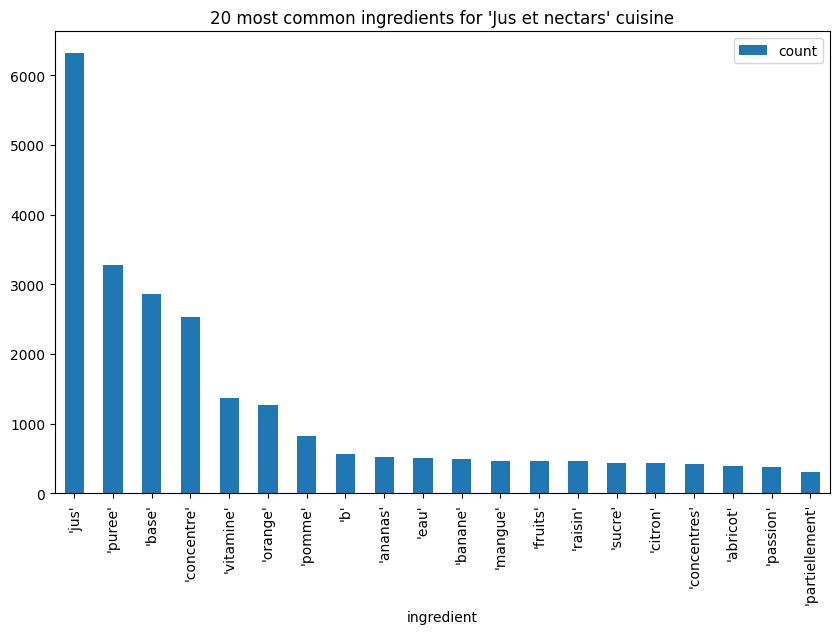

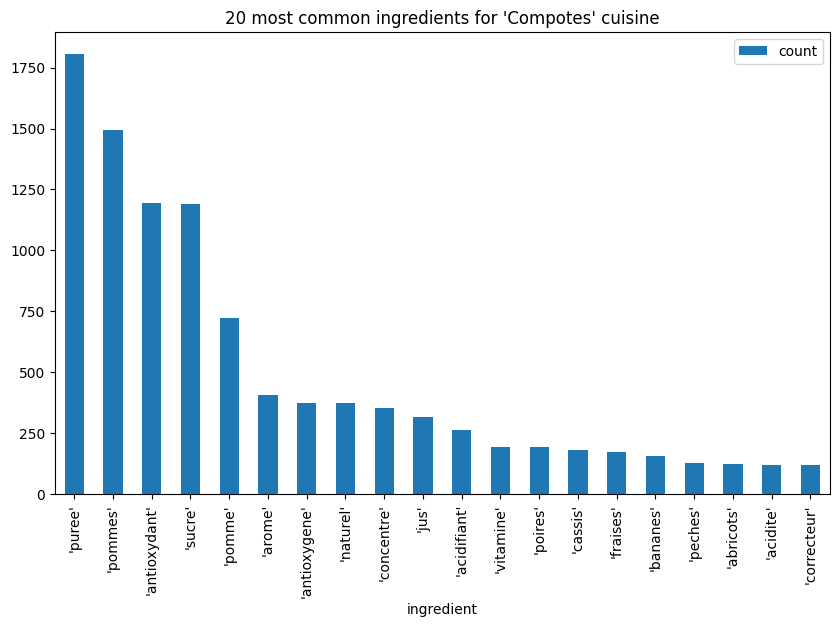

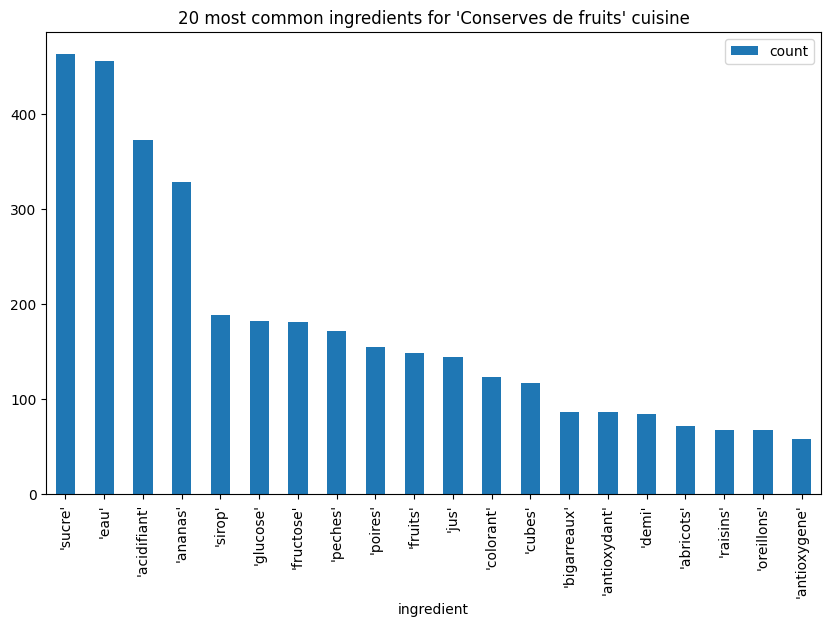

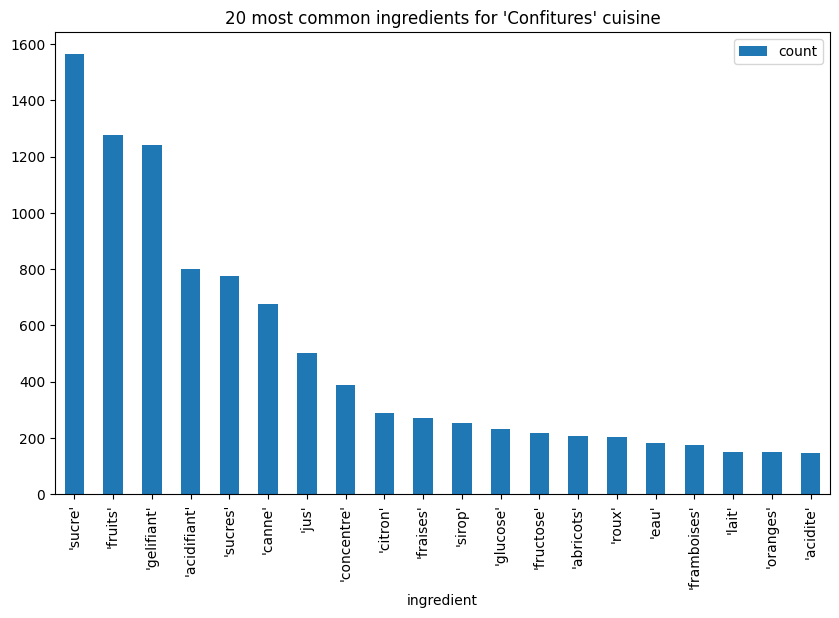

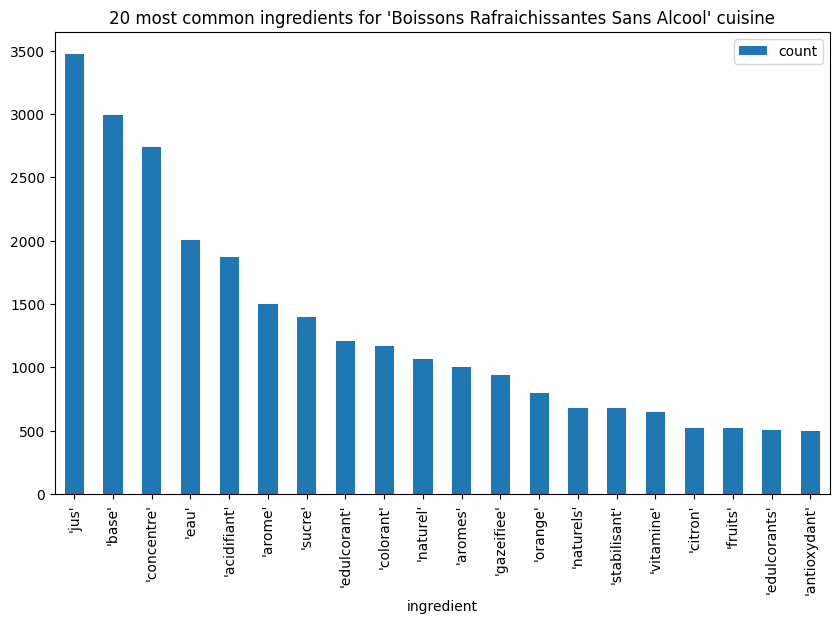

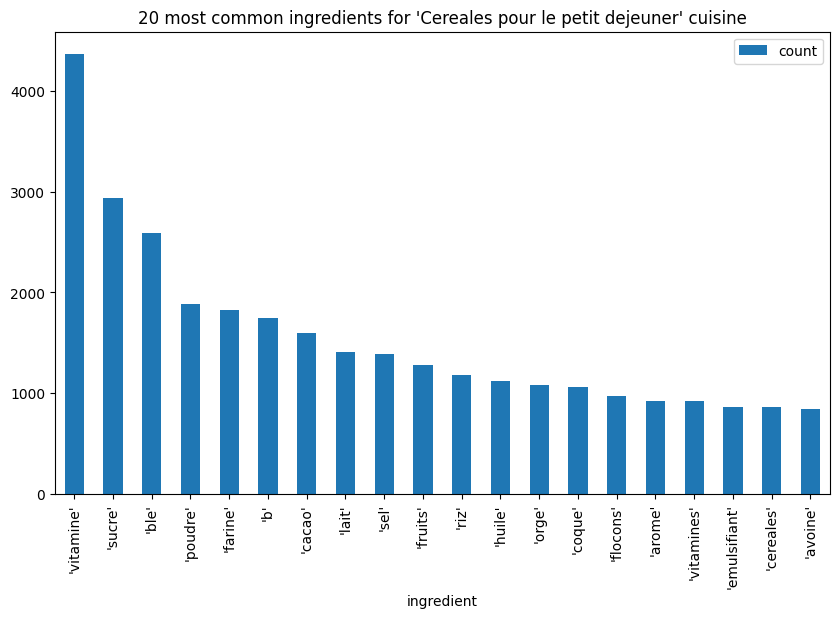

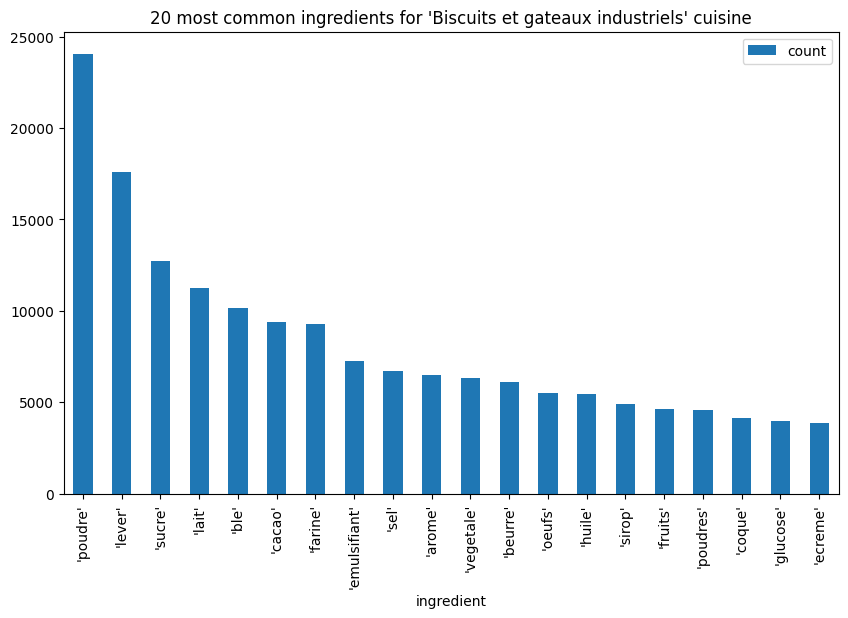

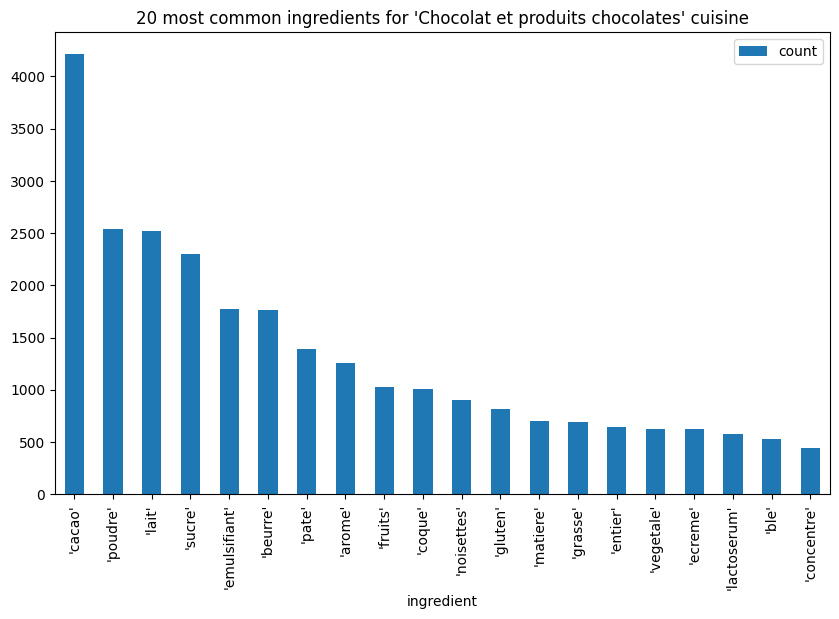

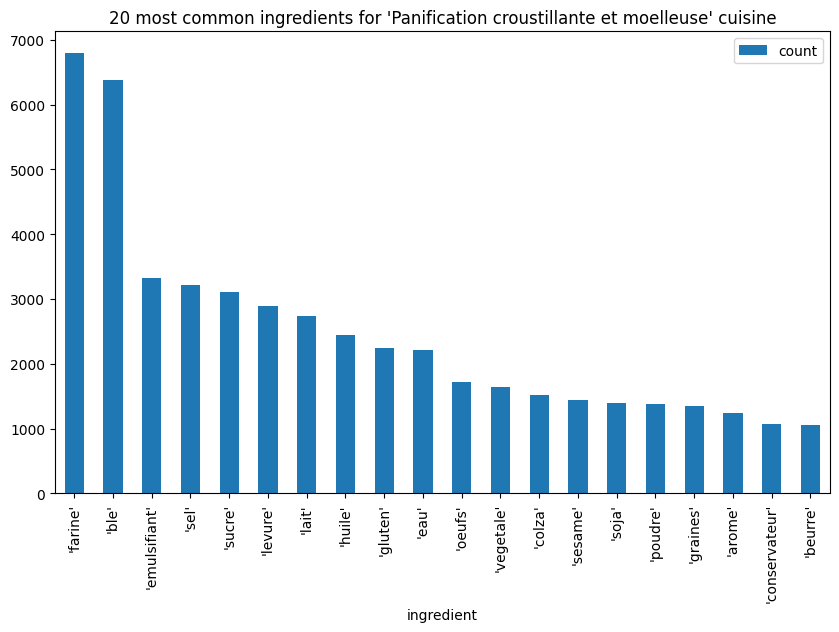

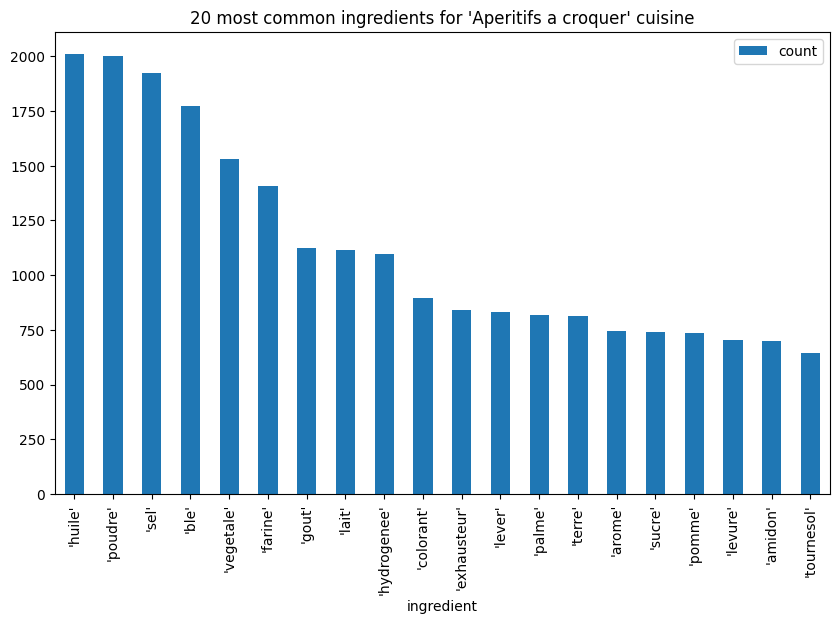

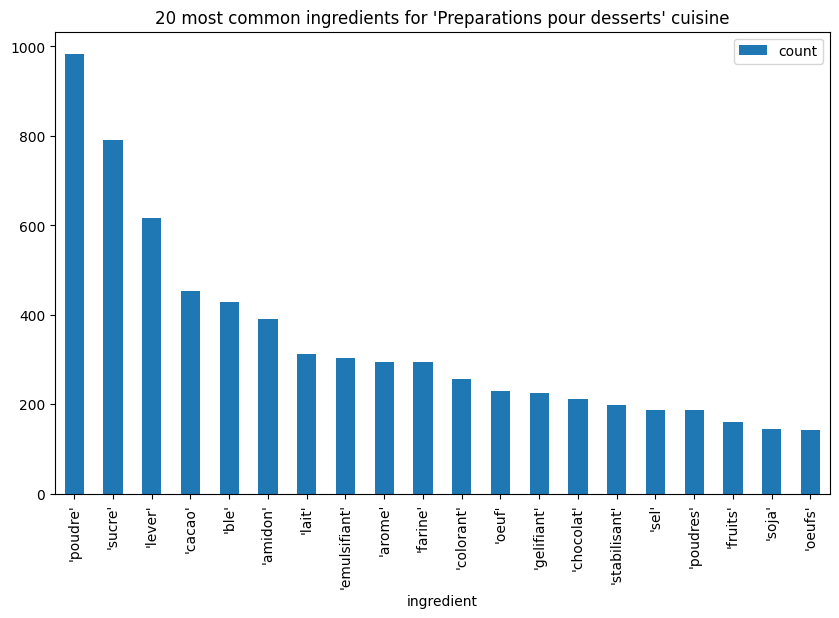

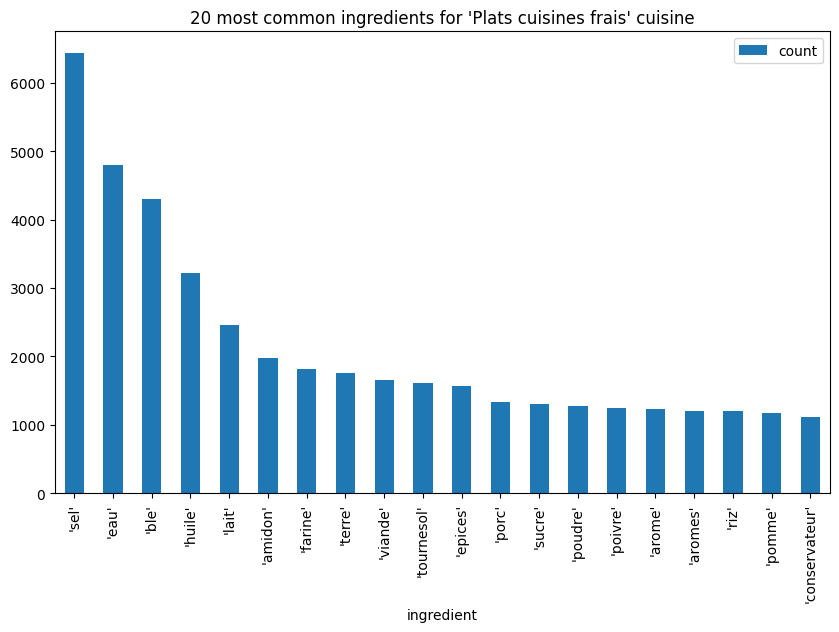

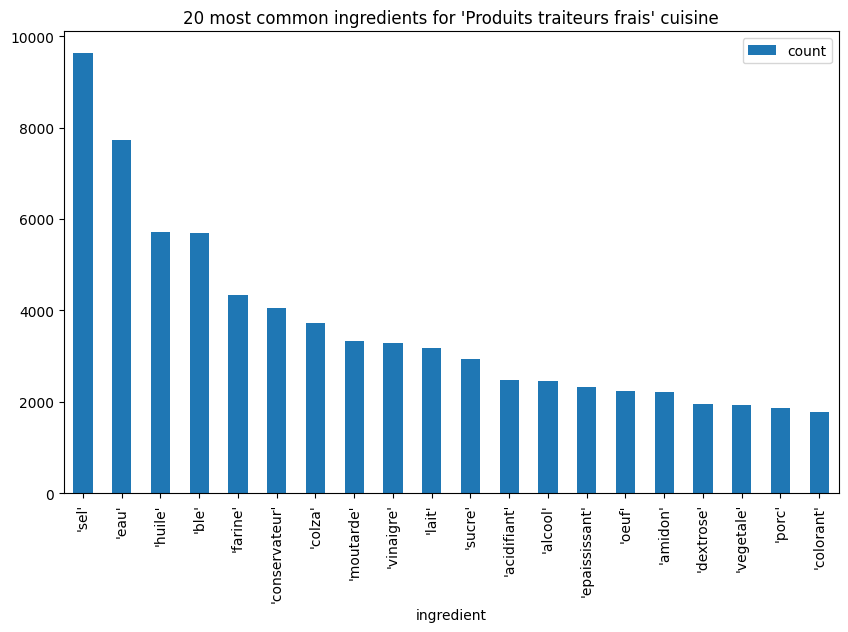

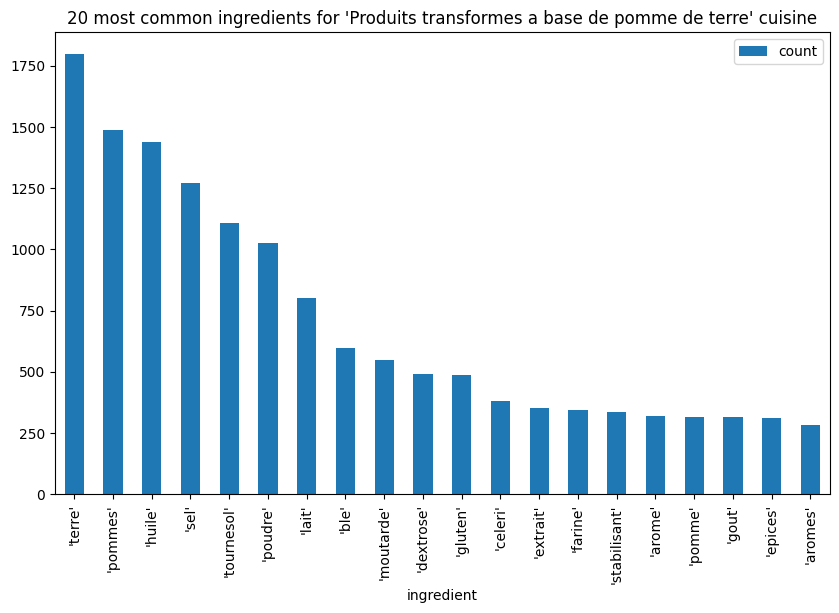

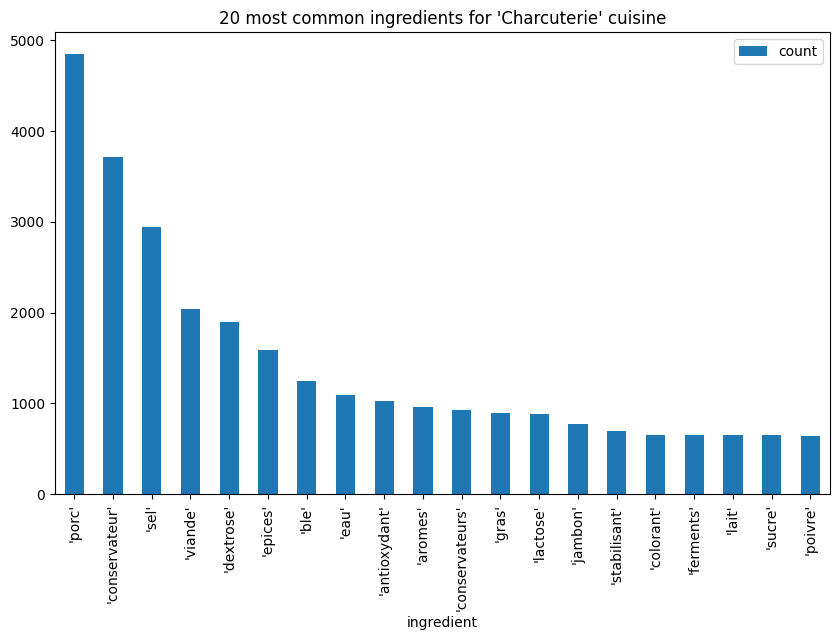

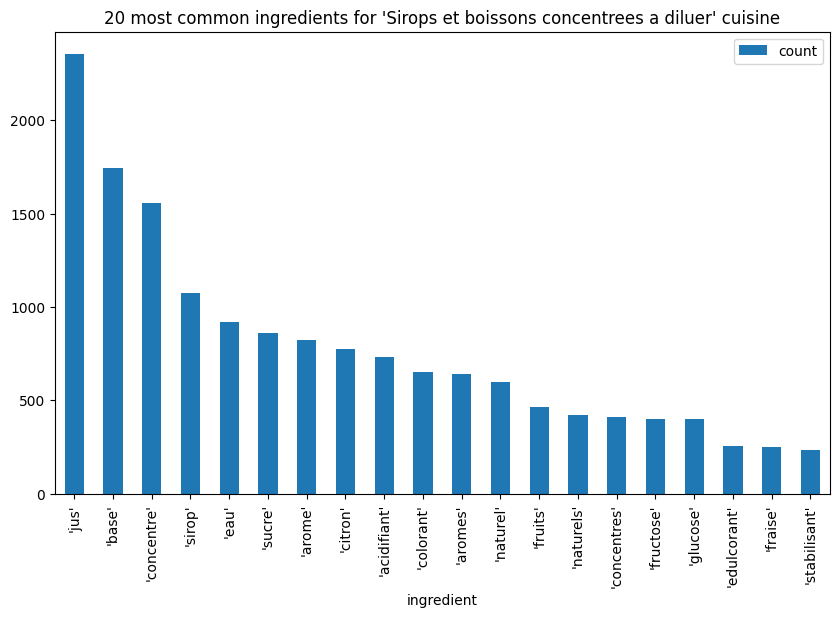

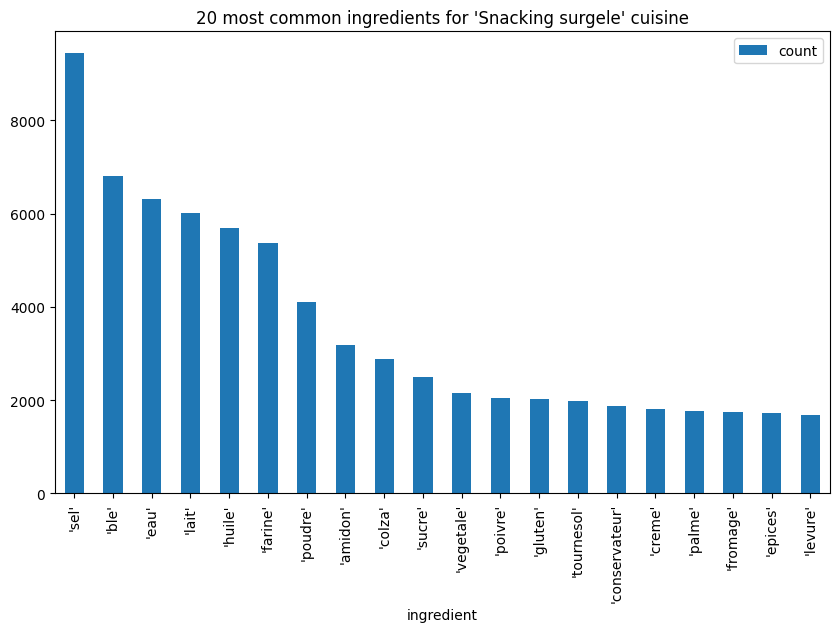

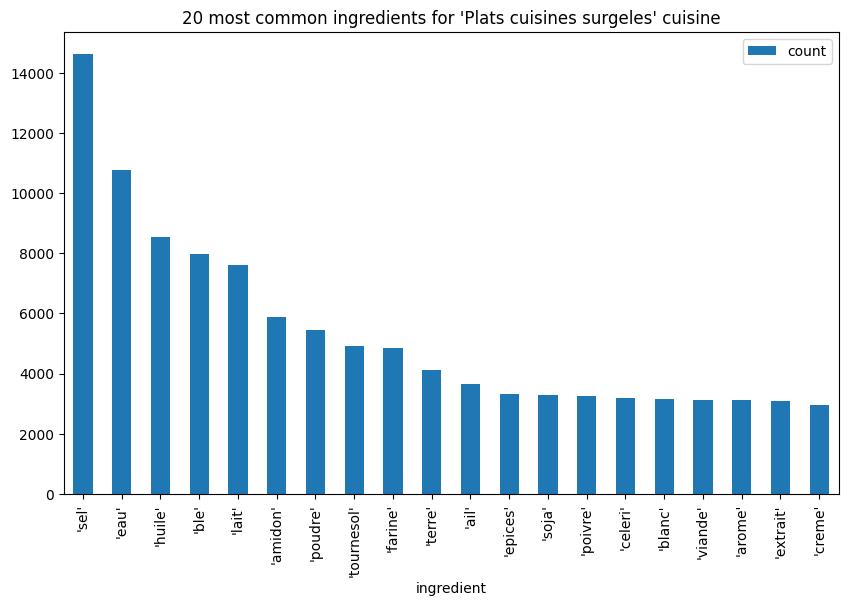

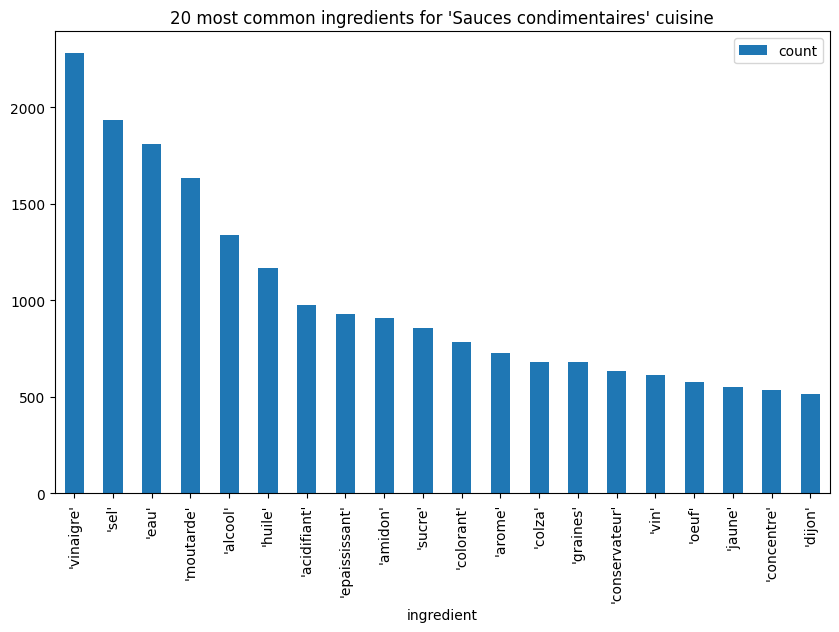

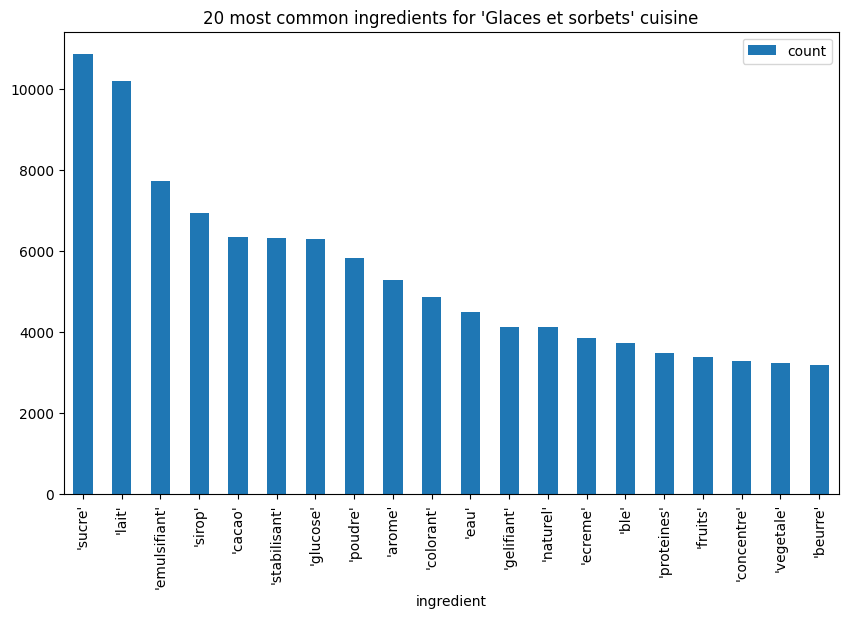

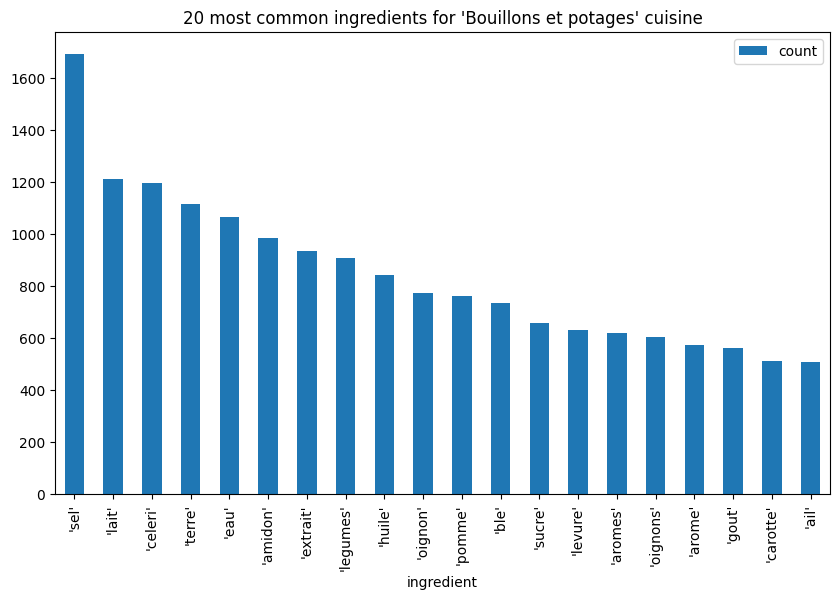

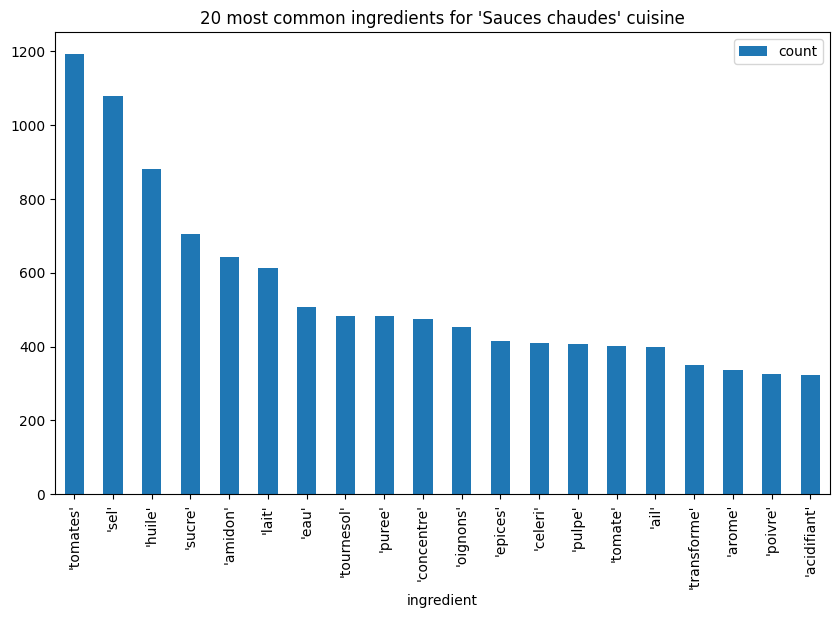

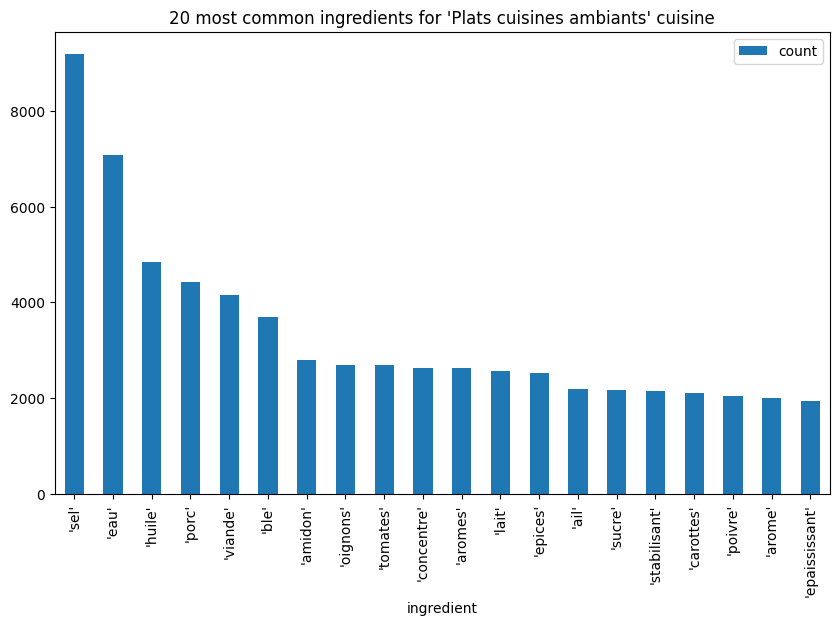

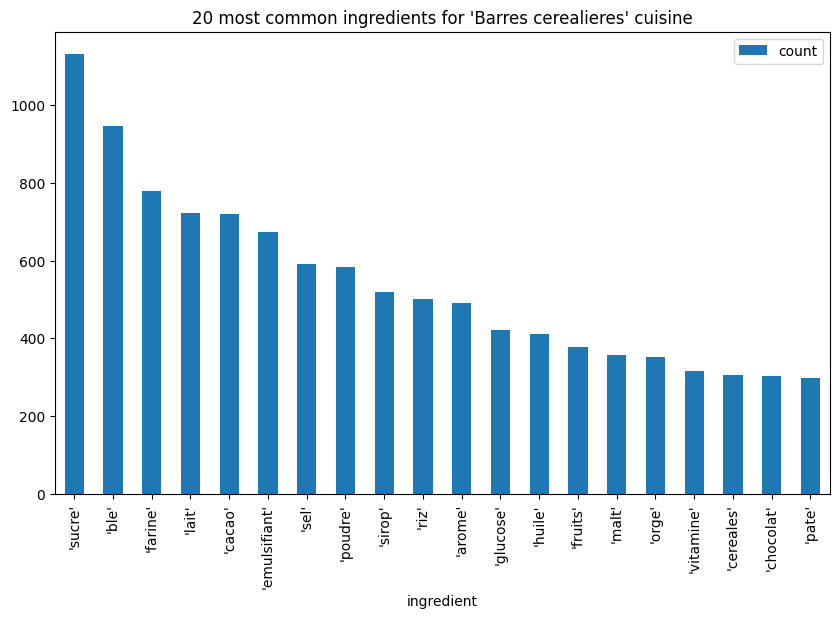

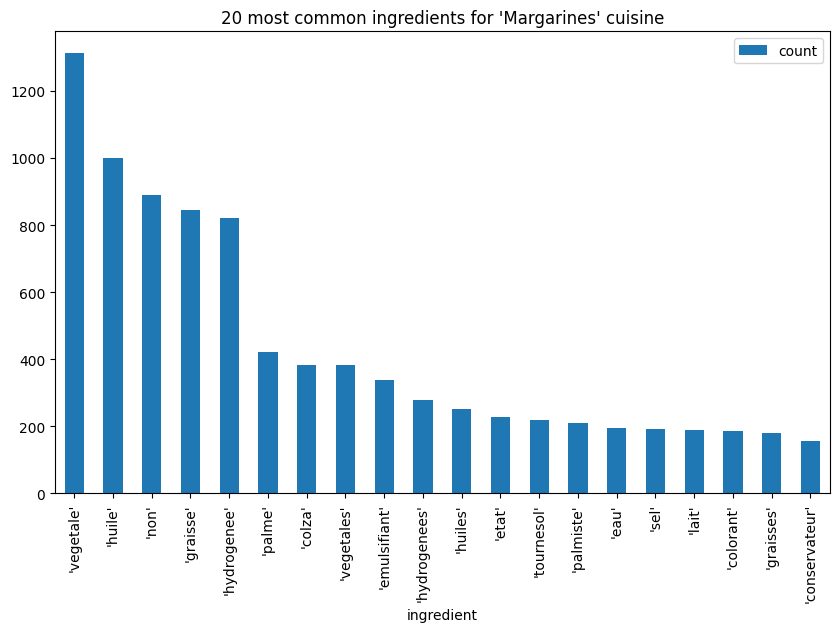

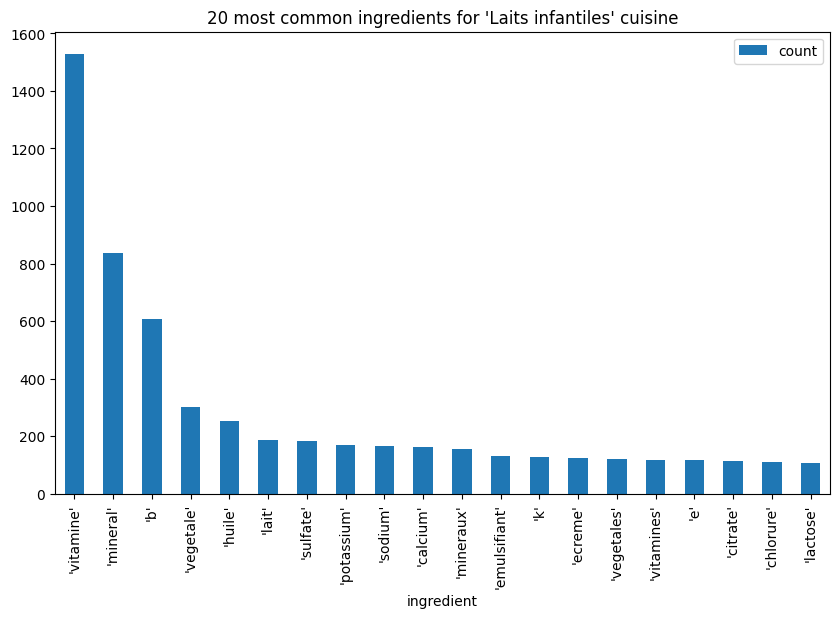

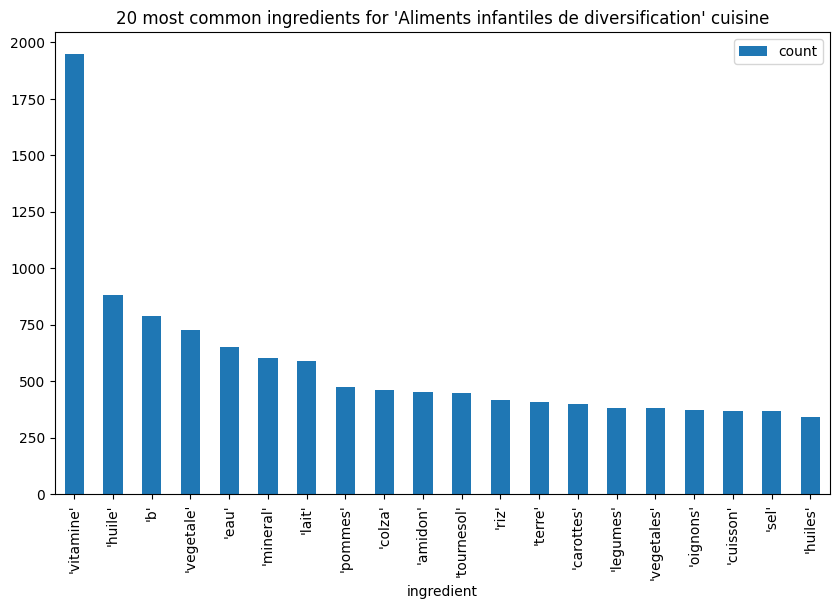

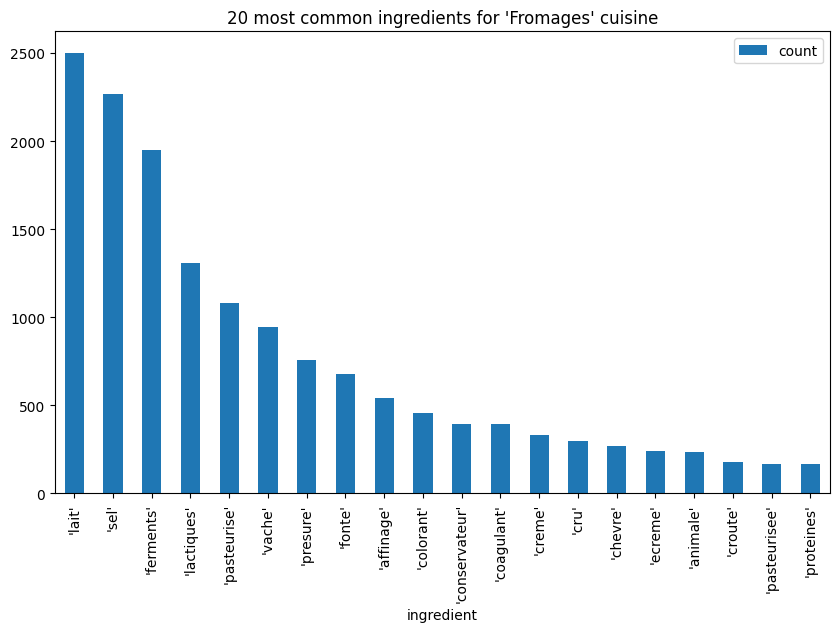

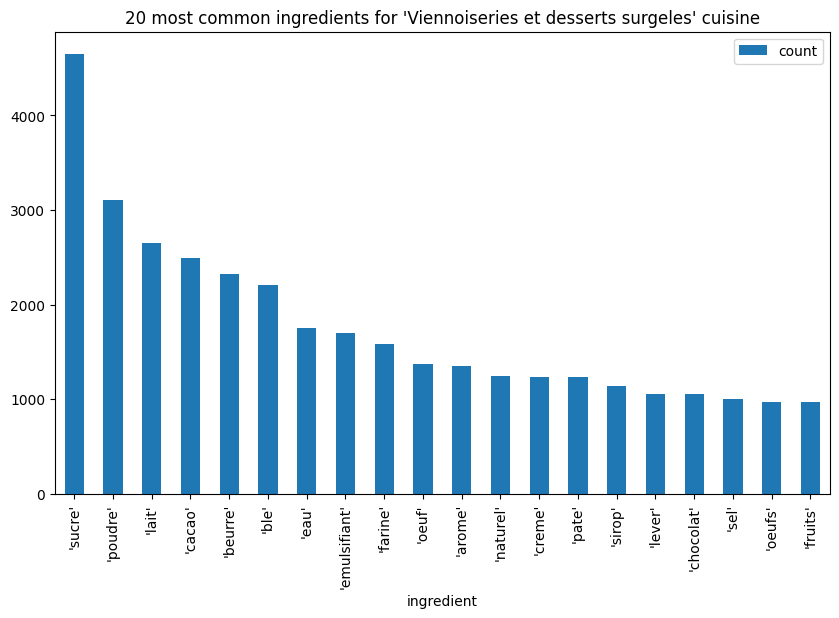

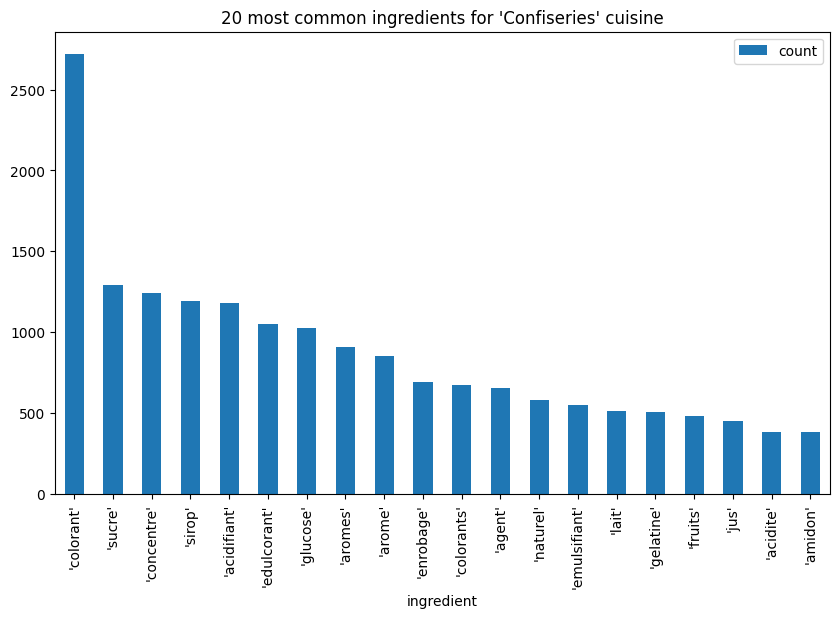

In [50]:
import matplotlib.pyplot as plt

# bar char plot of top 20 most common ingredients
for key, value in cuisine_dict.items():
    mc = pd.DataFrame(value.most_common(20), columns=["ingredient", "count"])
    mc.plot(kind="bar", x="ingredient", figsize=(10,6), title="20 Most Common Ingredients")   
    plt.title("20 most common ingredients for '%s' cuisine" % key)
    plt.show()

## Quick classification visualization

In [53]:
# get a vector of cuisines and ingredients
index1 = {}
for key, value in cuisine_dict.items():
    index1[key] = dict(value)
df1 = pd.DataFrame.from_dict(index1, orient='index')
df1 = df1.fillna(0)
cuisine_labels = [key for key, value in df1.iterrows()]
ingredients_labels = list(df1.columns)

# calculating the table of probabilities for the cuisines
inst_count=df1.sum(axis='columns')
df1_prob= df1.div(inst_count,axis='rows')

In [54]:
import numpy as np
from sklearn.manifold import MDS

mds = MDS(n_components=2,  random_state=1)
X = mds.fit_transform(df1_prob.astype(np.float64))
x1 = X[:,0]
y1 = X[:,1]

c:\Users\Thomas Aujoux\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\manifold\_mds.py:299: FutureWarning: The default value of `normalized_stress` will change to `'auto'` in version 1.4. To suppress this warning, manually set the value of `normalized_stress`.
  warnings.warn(


In [ ]:
#Define a function to generate randoms colors for further visualizations
def random_colours(number_of_colors):
    colors = []
    for i in range(number_of_colors):
        colors.append("#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]))
    return colors


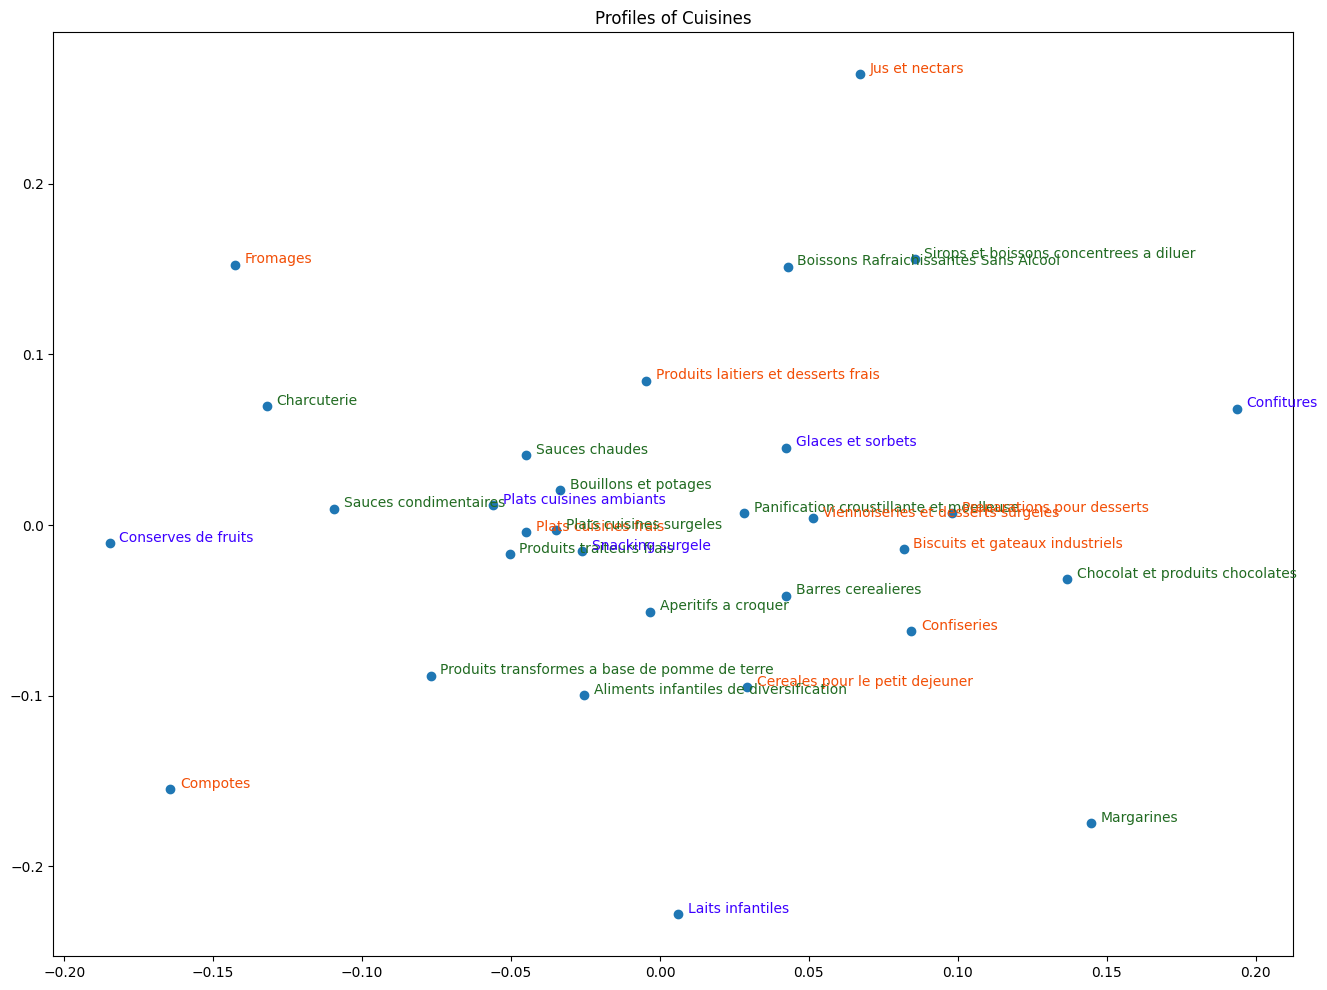

In [55]:
import matplotlib.pylab as pyl
pyl.rcParams['figure.figsize'] = (16.0, 12.0)

fig, ax = plt.subplots()
ax=plt.scatter(x1,y1)
plt.title('Profiles of Cuisines')

colors = {"Plats cuisines surgeles":    '#216b22',
"Glaces et sorbets":      '#3c00ff',
"Produits traiteurs frais": '#216b22',
"Biscuits et gateaux industriels"   :      '#f24e06',
"Plats cuisines frais":     '#f24e06',
"Snacking surgele":       '#3c00ff',
"Plats cuisines ambiants":        '#3c00ff',
"Produits laitiers et desserts frais":       '#f24e06',
"Charcuterie":     '#216b22',
"Panification croustillante et moelleuse":    '#216b22',
"Aperitifs a croquer":    '#216b22',
"Bouillons et potages":     '#216b22',
"Chocolat et produits chocolates":    '#216b22',
"Viennoiseries et desserts surgeles":         '#f24e06',
"Sauces condimentaires":    '#216b22',
"Boissons Rafraichissantes Sans Alcool":    '#216b22',
"Cereales pour le petit dejeuner":         '#f24e06',
"Aliments infantiles de diversification":    '#216b22',
"Produits transformes a base de pomme de terre":    '#216b22',
"Fromages":         '#f24e06',
"Barres cerealieres":    '#216b22',
"Jus et nectars":         '#f24e06',
"Confitures":      '#3c00ff',
"Preparations pour desserts":         '#f24e06',
"Sauces chaudes":    '#216b22',
"Laits infantiles":      '#3c00ff',
"Compotes":         '#f24e06',
"Margarines":    '#216b22',
"Sirops et boissons concentrees a diluer":    '#216b22',
"Sauces condimentaires_RHF":         '#f24e06',
"Bouillons et potages_RHF":      '#3c00ff',
"Conserves de fruits":      '#3c00ff',
"Confiseries":         '#f24e06',
}

for i, name in enumerate(cuisine_labels):
    plt.annotate(name, (x1[i], y1[i]), color=colors[name], xytext=(7,1), textcoords='offset points')
    
plt.show()

[[ 0.47530297 -1.51851649]
 [ 0.47369072 -1.5644834 ]
 [ 0.40711589 -0.575192  ]
 [ 0.52977084 -0.92946212]
 [ 0.11860193 -1.20653007]]


<Axes: >

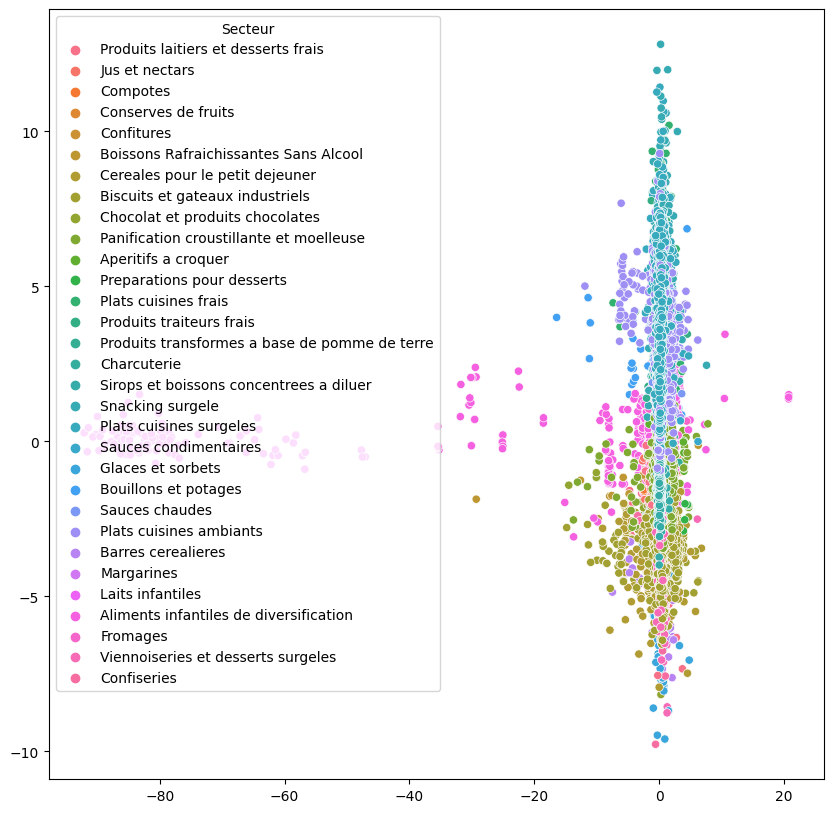

In [69]:
import pandas as pd
df = pd.read_csv(r'C:\Users\Thomas Aujoux\Documents\GitHub\food-classification\data_preparation\data_clean\clean.csv', sep=',')
df = df.drop("Unnamed: 0", axis = 1)
df.head()

import seaborn as sns 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

y = df["Secteur"]
X = df.drop(columns=["Code_produit", "Secteur"])
labels = np.unique(df["Secteur"].values)
labelcount = len(labels)
N_COMPONENT = 2

lda = LDA(n_components=N_COMPONENT)
lda_data = lda.fit_transform(X,y)

print(lda_data[:5])

plt.figure(figsize=(10,10))
sns.scatterplot(x = lda_data[:, 0], y = lda_data[:, 1], hue = y, data=df)